In [56]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

In [57]:
img = cv2.imread('./test_images/0x0.jpg')     #importing image
img.shape

(416, 416, 3)

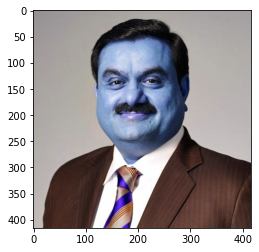

In [58]:
plt.imshow(img) 

#convert to gray image

In [59]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(416, 416)

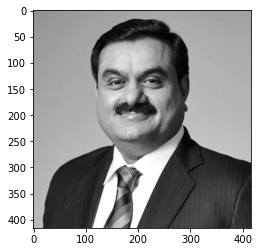

In [60]:
plt.imshow(gray, cmap='gray')

In [61]:
# Loading face and eye cascade xml file.
face_cascade = cv2.CascadeClassifier('./openCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./openCV/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)    # detectMultiScale - Detects objects of different sizes in the input image.
faces

array([[ 95,  58, 194, 194]])

# [x,y,height,width]

In [62]:
# storing first face in x,y,w,h.
(x,y,w,h) = faces[0]
x,y,w,h

(95, 58, 194, 194)

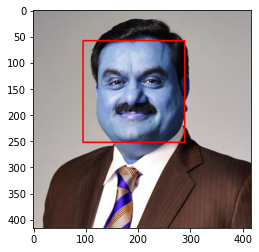

In [63]:
# Drawing rectangle around face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)    #parameters - img,(left,top),(right,bottom),color,thikness
plt.imshow(face_img)

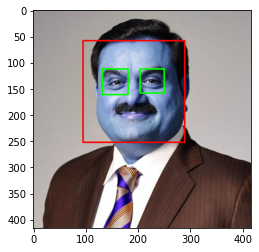

In [64]:
# Creating rectangle around eyes
# ROI - Region Of Interest
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]    
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

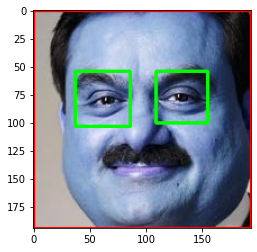

In [65]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# Function to input image ==>

In [66]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

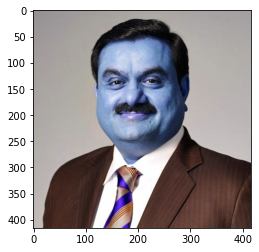

In [67]:
# printing original image
original_image = cv2.imread('./test_images/0x0.jpg')
plt.imshow(original_image)

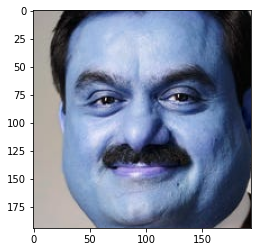

In [68]:
# printing image after passing through def get_cropped_image_if_2_eyes
cropped_image = get_cropped_image_if_2_eyes('./test_images/0x0.jpg')
plt.imshow(cropped_image)

# creating new folder (cropped images) for cropped images

In [69]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped"

In [70]:
import os    #The os.path module is always the path module suitable for the operating system Python is running on, and therefore usable for local paths.
img_dirs = []
for entry in os.scandir(path_to_data):    #The os.scandir() method in Python is used to get an iterator of os.
    if entry.is_dir():
        img_dirs.append(entry.path)

In [71]:
img_dirs

['./dataset\\CyrusPoonawalla',
 './dataset\\Dhirubhai_Ambani_images',
 './dataset\\GautamAdani',
 './dataset\\MukeshAmbani',
 './dataset\\RadhakishanDamani',
 './dataset\\SavitriJindal',
 './dataset\\ShivNadar']

In [72]:
# import shutil     #Shutil module in Python provides many functions of high-level operations on files and collections of files.
# if os.path.exists(path_to_cr_data):
#     shutil.rmtree(path_to_cr_data)
# os.mkdir(path_to_cr_data)    #mkdir() method in Python is used to create a directory named path with the specified numeric mode

In [73]:
cropped_image_dirs = []
businessmen_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    businessmen_name = img_dir.split('\\')[-1]
    print(businessmen_name)
    
    businessmen_file_names_dict[businessmen_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            print("biz name: ", businessmen_name)
            cropped_folder = ".\dataset\croppeddataset\\" + businessmen_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = businessmen_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            print("file path is : ", cropped_file_path)
            cv2.imwrite(fr"{cropped_file_path}", roi_color)
            businessmen_file_names_dict[businessmen_name].append(cropped_file_path)
            count += 1

CyrusPoonawalla
biz name:  CyrusPoonawalla
Generating cropped images in folder:  .\dataset\croppeddataset\CyrusPoonawalla
file path is :  .\dataset\croppeddataset\CyrusPoonawalla\CyrusPoonawalla1.png
biz name:  CyrusPoonawalla
file path is :  .\dataset\croppeddataset\CyrusPoonawalla\CyrusPoonawalla2.png
biz name:  CyrusPoonawalla
file path is :  .\dataset\croppeddataset\CyrusPoonawalla\CyrusPoonawalla3.png
Dhirubhai_Ambani_images
biz name:  Dhirubhai_Ambani_images
Generating cropped images in folder:  .\dataset\croppeddataset\Dhirubhai_Ambani_images
file path is :  .\dataset\croppeddataset\Dhirubhai_Ambani_images\Dhirubhai_Ambani_images1.png
biz name:  Dhirubhai_Ambani_images
file path is :  .\dataset\croppeddataset\Dhirubhai_Ambani_images\Dhirubhai_Ambani_images2.png
biz name:  Dhirubhai_Ambani_images
file path is :  .\dataset\croppeddataset\Dhirubhai_Ambani_images\Dhirubhai_Ambani_images3.png
biz name:  Dhirubhai_Ambani_images
file path is :  .\dataset\croppeddataset\Dhirubhai_Ambani

In [74]:
businessmen_file_names_dict = {}
for img_dir in cropped_image_dirs:
    businessmen_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    businessmen_file_names_dict[businessmen_name] = file_list
businessmen_file_names_dict

{'.\\dataset\\croppeddataset\\CyrusPoonawalla': ['.\\dataset\\croppeddataset\\CyrusPoonawalla\\CyrusPoonawalla1.png',
  '.\\dataset\\croppeddataset\\CyrusPoonawalla\\CyrusPoonawalla2.png',
  '.\\dataset\\croppeddataset\\CyrusPoonawalla\\CyrusPoonawalla3.png'],
 '.\\dataset\\croppeddataset\\Dhirubhai_Ambani_images': ['.\\dataset\\croppeddataset\\Dhirubhai_Ambani_images\\Dhirubhai_Ambani_images1.png',
  '.\\dataset\\croppeddataset\\Dhirubhai_Ambani_images\\Dhirubhai_Ambani_images2.png',
  '.\\dataset\\croppeddataset\\Dhirubhai_Ambani_images\\Dhirubhai_Ambani_images3.png',
  '.\\dataset\\croppeddataset\\Dhirubhai_Ambani_images\\Dhirubhai_Ambani_images4.png',
  '.\\dataset\\croppeddataset\\Dhirubhai_Ambani_images\\Dhirubhai_Ambani_images5.png'],
 '.\\dataset\\croppeddataset\\GautamAdani': ['.\\dataset\\croppeddataset\\GautamAdani\\GautamAdani1.png',
  '.\\dataset\\croppeddataset\\GautamAdani\\GautamAdani2.png',
  '.\\dataset\\croppeddataset\\GautamAdani\\GautamAdani3.png',
  '.\\dataset\\c